# Methods & Results
We are going to use multiple analysis to classify the type of the animals using 16 variables including hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize as our predictors. To predict the class of a new observation, the algorithms of each type will be further explained before implementation.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append( '..' )
from src.pre_processing import *
from src.train_and_predict_model import *
from src.line_plot import *
from src.para_optimize import *
from src.std_acc import *
from src.line_plot import *

ModuleNotFoundError: No module named 'tabulate'

In [ ]:
# reading the data as a csv from the uci web server, with header = false as the data contains no header
# Adding column names to the data
colm = ["animalName", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", 
        "predator", "toothed", "backbone", "breathes", "venomous", "fins", 
        "legs", "tail", "domestic", "catsize", "type"]

zoo_data = pre_process("https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data", colm)

The first thing is to import the data. The data set is downloaded from [UCI repository]("https://archive-beta.ics.uci.edu/ml/datasets/zoo"). It is then saved as a csv file in this project repository. Some exploratory data analysis needs to be run before running the actual analyses on the data set. Here is a preview of pre-processed data set:

In [9]:
zoo_data = pd.read_csv("../results/csv/head.csv")
zoo_data

,Unnamed: 0,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [3]:
#uncomment this line if the server is down for fetching the data
#zoo_data = pd.read_csv("./data/zoo.csv")
zoo_data.head()

,animalName,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# saving the data as a csv file in our data directory
# zoo_data.to_csv(r'./data/zoo.csv')

In [5]:
# Check if there are missing values
print("Whether the dataset contains missing value: " + str(zoo_data.isna().any().any()))

Whether the dataset contains missing value: False


In [6]:
# drop the first column
#zoo_data = zoo_data.drop(zoo_data.columns[[0,1]], axis=1)

Below is a summary of dataset:

In [10]:
# Create a summary of the data set, including descriptive statistics
zoo_data.describe()

,Unnamed: 0,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.000000
mean,2.000000,0.800000,0.0,0.200000,0.800000,0.0,0.200000,0.800000,1.0,1.0,0.800000,0.0,0.200000,3.200000,0.600000,0.0,0.800000
std,1.581139,0.447214,0.0,0.447214,0.447214,0.0,0.447214,0.447214,0.0,0.0,0.447214,0.0,0.447214,1.788854,0.547723,0.0,0.447214
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,1.0,1.0,1.000000,0.0,0.000000,4.000000,0.000000,0.0,1.000000
50%,2.000000,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,1.0,1.0,1.000000,0.0,0.000000,4.000000,1.000000,0.0,1.000000
75%,3.000000,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,1.0,1.0,1.000000,0.0,0.000000,4.000000,1.000000,0.0,1.000000
max,4.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.0,1.0,1.000000,0.0,1.000000,4.000000,1.000000,0.0,1.000000


As there aren't missing values in the data set, we can clearly deduce that the data set is clean according to the data summary we generated above. Since most features are binary and categorical, there is no need to do normalization and standardization.

:::{figure-md} f1
<img src="../results/figures/fig1.png" alt="num" class="bg-primary mb-1" width="800px">

A summary table of the data set
:::

As shown in [fig.1](f1), the histograms of each feature are generated. The ones with skewed distribution might be more decisive in the prediction. However, since the data set is relatively small, all the features except the `animalName` are going to be used to predict. In the next part, we are going to split the data, into the training set and testing set. After that, different classification models will be trained and evaluated.

## Classification
Now we will use the training set to build an accurate model, whereas the testing set is used to report the accuracy of the models. Here is a list of algorithms we will use in the following section:

K Nearest Neighbor(KNN)
<br>
Decision Tree
<br>
Support Vector Machine
<br>
Logistic Regression

In [9]:
# extracting the feature that will predict
feature = zoo_data[["hair", "feathers", "eggs", "milk", "airborne", 
                   "aquatic", "predator", "toothed", "backbone", "breathes", 
                   "venomous", "fins", "legs", "tail", "domestic", "catsize"]]
# making it as a X
X = feature
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [10]:
# taking the y values, the type
y = zoo_data['type']
y[0:5]

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

The training set and test set are splitted.

In [11]:
# splitting the dataset 80-20 for train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Training set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Training set: (80, 16) (80,)
Test set: (21, 16) (21,)


### KNN
KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) 
with some basic mathematics we might have learned earlier. Basically in terms of geometry we can always calculate the distance between points on a graph. Similarly, using KNN we can group similar points together and predict the target with our feature variables(x).

In [12]:
#training the model for different set of K values and finding the best K value
Ks = 81
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

std_acc = stdAcc(yhat,y_test,Ks)
mean_acc

array([1.        , 0.95238095, 0.95238095, 0.9047619 , 0.85714286,
       0.80952381, 0.85714286, 0.76190476, 0.76190476, 0.76190476,
       0.76190476, 0.76190476, 0.76190476, 0.76190476, 0.76190476,
       0.76190476, 0.76190476, 0.71428571, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.47619048, 0.42857143, 0.42857143, 0.42857143, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

:::{figure-md} f2
<img src="../results/figures/k_accuracy.png" alt="num" class="bg-primary mb-1" width="500px">

A plot reveals the relationship between K and corresponding accuracy
:::

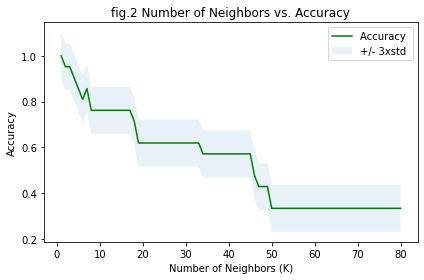

In [13]:
# plotting the accuracy for different K values
# plt.plot(range(1,Ks),mean_acc,'g')
# plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
# plt.legend(('Accuracy ', '+/- 3xstd'))
# plt.ylabel('Accuracy ')
# plt.xlabel('Number of Neighbors (K)')
# plt.title('fig.2 Number of Neighbors vs. Accuracy')
# plt.tight_layout()
line_plot(Ks, mean_acc, std_acc, "Number of Neighbors (K)", "Accuracy", "fig.2 Number of Neighbors vs. Accuracy")
plt.show()

In [14]:
print("The best accuracy was with the values", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

The best accuracy was with the values 1.0 with k= 1


In [15]:
# Finding the K value using Grid Search
knn = KNeighborsClassifier()
k_vals = list(range(1, 21))
param_grid = dict(n_neighbors=k_vals)

para_optimize(knn, param_grid, 3, X_train, y_train)

{'n_neighbors': 1}

### KNN final model & Evaluation

In [16]:
# as the best accuracy was with K = 1
# using K = 1 for the final KNN model
# Final KNN model is here used the splited test part to train again for better training, and better prediction
# KNN evaluation is also here scroll through the output
final_knn_model = finalModel("KNN", 1, X_train, X_test, y_train, y_test, X, y)

KNN INFO: So the accuracy score for K = 1 is 1.0

KNN Cross Validate: 

fit_time       0.000539
score_time     0.000792
test_score     0.936847
train_score    1.000000
dtype: float64

KNN Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



KNN Cross Validation Result:

In [34]:
knn_cross_validate_result = pd.read_csv("../results/csv/knn_cross_validate_result.csv")
knn_cross_validate_result

,Unnamed: 0,0
0,fit_time,0.000362
1,score_time,0.002690
2,test_score,0.936847
3,train_score,1.000000


KNN Classification Report:

In [40]:
knn_classification_report= pd.read_csv("../results/csv/knn_classification_report.csv")
knn_classification_report

,Unnamed: 0,precision,recall,f1-score,support
0,1,1.0,1.0,1.0,7.0
1,2,1.0,1.0,1.0,5.0
2,4,1.0,1.0,1.0,1.0
3,5,1.0,1.0,1.0,1.0
4,6,1.0,1.0,1.0,3.0
5,7,1.0,1.0,1.0,4.0
6,accuracy,1.0,1.0,1.0,1.0
7,macro avg,1.0,1.0,1.0,21.0
8,weighted avg,1.0,1.0,1.0,21.0


### Decision Tree
A decision tree is a decision support tool that uses a tree-like model of decisions and their 
possible consequences, including chance event outcomes, resource costs, and utility
The goal of using a Decision Tree is to create a training model that can use to predict 
the class or value of the target variable by learning simple decision rules inferred 
from prior data(training data).

In [17]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    # Train Model and Predict  
    decTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    decTree.fit(X_train,y_train)
    yhat=decTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

std_acc = stdAcc(yhat,y_test,Ks)
mean_acc

array([0.57142857, 0.61904762, 0.80952381, 0.80952381, 0.9047619 ,
       0.85714286, 0.9047619 , 0.9047619 , 0.9047619 , 0.85714286,
       0.9047619 , 0.85714286, 0.85714286, 0.9047619 , 0.9047619 ,
       0.9047619 , 0.85714286, 0.9047619 , 0.85714286, 0.85714286,
       0.85714286, 0.9047619 , 0.85714286, 0.9047619 , 0.9047619 ,
       0.85714286, 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.85714286,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.85714286,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ])

:::{figure-md} f3
<img src="../results/figures/dt_accuracy.png" alt="num" class="bg-primary mb-1" width="500px">

A plot reveals the relationship between deepth and corresponding accuracy
:::

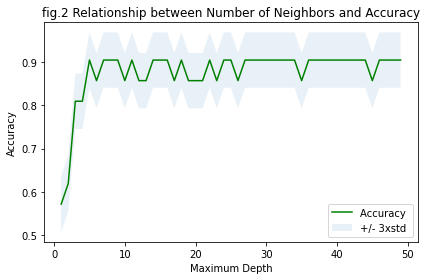

In [18]:
# plt.plot(range(1,Ks),mean_acc,'g')
# plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.legend(('Accuracy ', '+/- 3xstd'))
# plt.ylabel('Accuracy ')
# plt.xlabel('Max_Depth')
# plt.title('fig.3 Max_depth vs. Accuracy')
# plt.tight_layout()
line_plot(Ks, mean_acc, std_acc, "Maximum Depth", "Accuracy", "fig.2 Relationship between Number of Neighbors and Accuracy")
plt.show()

In [19]:
print("The best accuracy was with the values", mean_acc.max(), "with max_depth =", mean_acc.argmax()+1)

The best accuracy was with the values 0.9047619047619048 with max_depth = 5


### Decision Tree final model & evaluation

In [20]:
# As Best is max depth = 5
# using max depth = 5 for the final decision tree
# Final decision tree is here used the split test part to train again for better training, and better prediction
# DT evaluation is also here scroll through the output
Final_dec_Tree = finalModel("DT", 5, X_train, X_test, y_train, y_test, X, y)

DT INFO: So the accuracy score for max depth = 5 is 0.9523809523809523

DT Cross Validate: 

fit_time       0.000673
score_time     0.000414
test_score     0.937500
train_score    0.995833
dtype: float64

DT Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       1.00      0.75      0.86         4

    accuracy                           0.95        21
   macro avg       0.96      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



/Users/Elaine/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


DT Cross Validation Result:

In [36]:
dt_cross_validate_result = pd.read_csv("../results/csv/dt_cross_validate_result.csv")
dt_cross_validate_result

,Unnamed: 0,0
0,fit_time,0.001270
1,score_time,0.000273
2,test_score,0.950000
3,train_score,0.995833


DT Classification Report:

In [37]:
dt_classification_report = pd.read_csv("../results/csv/dt_classification_report.csv")
dt_classification_report

,Unnamed: 0,precision,recall,f1-score,support
0,1,1.000000,1.000000,1.000000,7.000000
1,2,1.000000,1.000000,1.000000,5.000000
2,4,1.000000,1.000000,1.000000,1.000000
3,5,1.000000,1.000000,1.000000,1.000000
4,6,0.750000,1.000000,0.857143,3.000000
5,7,1.000000,0.750000,0.857143,4.000000
6,accuracy,0.952381,0.952381,0.952381,0.952381
7,macro avg,0.958333,0.958333,0.952381,21.000000
8,weighted avg,0.964286,0.952381,0.952381,21.000000


### Support Vector Machine
SVM or Support Vector Machine is a linear model for classification and regression problems. 
It can solve linear and non-linear problems and work well for many practical problems. 
The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the 
data into classes.

### SVM training model Jaccard Score, final model and evaluation

In [21]:
#Final SVM is here used the splited test part to train again for better training, and better prediction
#svm evaluation train and final model is also here scroll through the output
svec = finalModel("SVM", -1, X_train, X_test, y_train, y_test, X, y)

SVM INFO: So the Training Jaccard score for SVM is: 0.8260869565217391

SVM Evaluation:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         4

    accuracy                           0.90        21
   macro avg       0.89      0.92      0.86        21
weighted avg       0.97      0.90      0.91        21



SVM Classification Report:

In [41]:
svm_classification_report= pd.read_csv("../results/csv/svm_classification_report.csv")
svm_classification_report

,Unnamed: 0,precision,recall,f1-score,support
0,1,1.000000,1.000000,1.000000,7.000000
1,2,1.000000,1.000000,1.000000,5.000000
2,4,0.333333,1.000000,0.500000,1.000000
3,5,1.000000,1.000000,1.000000,1.000000
4,6,1.000000,1.000000,1.000000,3.000000
5,7,1.000000,0.500000,0.666667,4.000000
6,accuracy,0.904762,0.904762,0.904762,0.904762
7,macro avg,0.888889,0.916667,0.861111,21.000000
8,weighted avg,0.968254,0.904762,0.912698,21.000000


### Logistic Regression
Logistic Regression is a "Supervised machine learning" algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature. That means Logistic regression is usually used for Binary classification problems.

### Logistic Regression training model Jaccard Score, final model and evaluation


In [22]:
# final LR model is here used the splited test part to train again for better training, and better prediction
# LR evaluation train and final model is also here scroll through the output
LR = finalModel("LR", -1, X_train, X_test, y_train, y_test, X, y)

LR INFO: So the Training Jaccard score for Logistic Regression is: 0.68

LR Evaluation: 

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       0.83      1.00      0.91         5
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         4

    accuracy                           0.81        21
   macro avg       0.66      0.71      0.63        21
weighted avg       0.81      0.81      0.76        21



/Users/Elaine/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Elaine/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Elaine/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR Classification Report:

In [43]:
lr_classification_report= pd.read_csv("../results/csv/lr_classification_report.csv")
lr_classification_report

,Unnamed: 0,precision,recall,f1-score,support
0,1,0.875000,1.000000,0.933333,7.000000
1,2,0.833333,1.000000,0.909091,5.000000
2,4,0.500000,1.000000,0.666667,1.000000
3,5,0.000000,0.000000,0.000000,1.000000
4,6,0.750000,1.000000,0.857143,3.000000
5,7,1.000000,0.250000,0.400000,4.000000
6,accuracy,0.809524,0.809524,0.809524,0.809524
7,macro avg,0.659722,0.708333,0.627706,21.000000
8,weighted avg,0.811508,0.809524,0.757947,21.000000
